In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
trades = pd.read_csv(
    "/content/historical_data.csv",
    engine="python",
    on_bad_lines="skip"
)

sentiment = pd.read_csv(
    "/content/fear_greed_index.csv",
    engine="python",
    on_bad_lines="skip"
)

trades.head(), sentiment.head()



(                                      Account  Coin Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107          7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107            7.98   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107          7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107          7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107          7.9894   
 
   Size Tokens Size USD Side     Timestamp IST Start Position Direction  \
 0      986.87  7872.16  BUY  02-12-2024 22:50              0       Buy   
 1          16   127.68  BUY  02-12-2024 22:50    986.5245955       Buy   
 2      144.09  1150.63  BUY  02-12-2024 22:50    1002.518996       Buy   
 3      142.98  1142.04  BUY  02-12-2024 22:50    1146.558564       Buy   
 4        8.73    69.75  BUY  02-12-2024 22:50    1289.488521       Buy   
 
   Closed PnL                                   Transaction Hash      Order ID  \
 0          0  0xec09451986a1874

In [9]:
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], dayfirst=True, errors="coerce")
trades["date"] = trades["Timestamp IST"].dt.date

sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date

trades.head(), sentiment.head()



(                                      Account  Coin Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107          7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107            7.98   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107          7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107          7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107          7.9894   
 
   Size Tokens Size USD Side       Timestamp IST Start Position Direction  \
 0      986.87  7872.16  BUY 2024-12-02 22:50:00              0       Buy   
 1          16   127.68  BUY 2024-12-02 22:50:00    986.5245955       Buy   
 2      144.09  1150.63  BUY 2024-12-02 22:50:00    1002.518996       Buy   
 3      142.98  1142.04  BUY 2024-12-02 22:50:00    1146.558564       Buy   
 4        8.73    69.75  BUY 2024-12-02 22:50:00    1289.488521       Buy   
 
   Closed PnL                                   Transaction Hash      Order ID  \
 0          0  0xec0

In [11]:
trades["Closed PnL"] = pd.to_numeric(trades["Closed PnL"], errors="coerce")

daily = trades.groupby("date").agg(
    avg_pnl=("Closed PnL", "mean"),
    win_rate=("Closed PnL", lambda x: (x > 0).mean()),
    trades_per_day=("Account", "count")
).reset_index()

daily.head()


,date,avg_pnl,win_rate,trades_per_day
0,2023-05-01,0.000000,0.000000,6
1,2023-12-05,0.000000,0.000000,18
2,2023-12-14,-18.675885,0.363636,22
3,2023-12-15,-12.316017,0.000000,4
4,2023-12-16,0.000000,0.000000,6


In [12]:
merged = daily.merge(sentiment, on="date", how="left")
merged.head()


,date,avg_pnl,win_rate,trades_per_day,timestamp,value,classification
0,2023-05-01,0.000000,0.000000,6,1.682919e+09,63.0,Greed
1,2023-12-05,0.000000,0.000000,18,1.701754e+09,75.0,Extreme Greed
2,2023-12-14,-18.675885,0.363636,22,1.702532e+09,72.0,Greed
3,2023-12-15,-12.316017,0.000000,4,1.702618e+09,70.0,Greed
4,2023-12-16,0.000000,0.000000,6,1.702705e+09,67.0,Greed


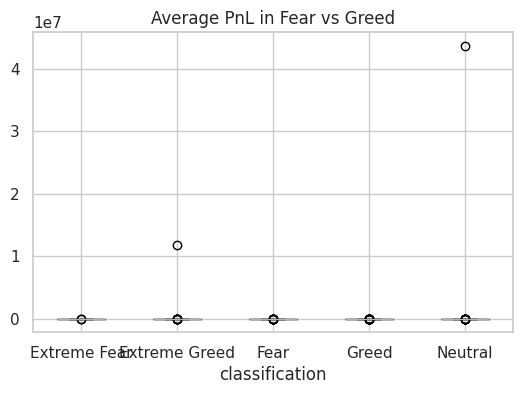

In [13]:
merged.boxplot(column="avg_pnl", by="classification", figsize=(6,4))
plt.title("Average PnL in Fear vs Greed")
plt.suptitle("")
plt.show()


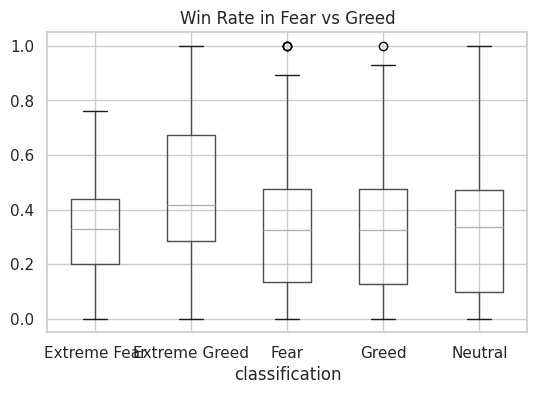

In [14]:
merged.boxplot(column="win_rate", by="classification", figsize=(6,4))
plt.title("Win Rate in Fear vs Greed")
plt.suptitle("")
plt.show()


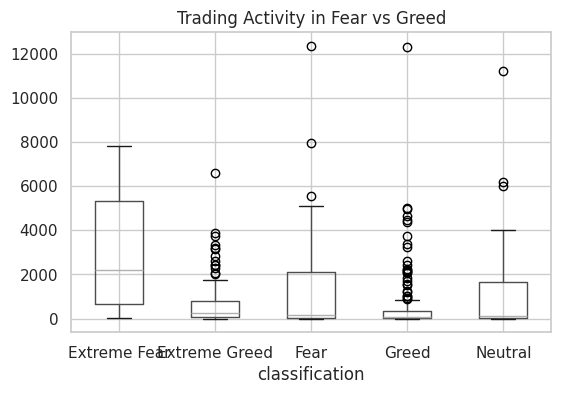

In [15]:
merged.boxplot(column="trades_per_day", by="classification", figsize=(6,4))
plt.title("Trading Activity in Fear vs Greed")
plt.suptitle("")
plt.show()


In [16]:
merged.groupby("classification")[["avg_pnl", "win_rate", "trades_per_day"]].mean()


,avg_pnl,win_rate,trades_per_day
classification,,,
Extreme Fear,36.138289,0.330382,3010.571429
Extreme Greed,103485.680340,0.467810,695.938596
Fear,31.302281,0.329655,1338.967033
Greed,38.879988,0.336496,517.808290
Neutral,651915.437131,0.333602,1111.656716
